boundary: [11.687]
upper: 149
lower: 140


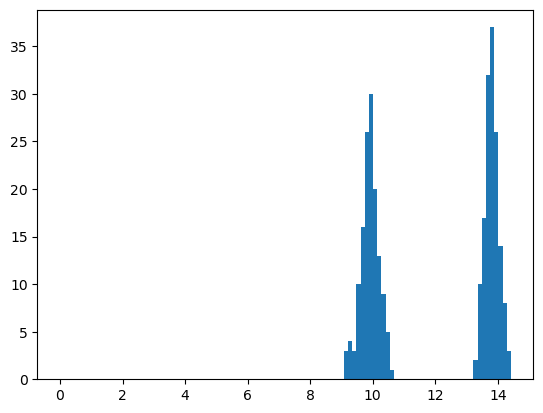

In [6]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

#file paths
def count_lipids(run_ind):
    
    path = f"/home/jonathan/Documents/grabelab/cftr/independent-partial-dissociation/{run_ind}/topology/input.gro"
    #f"/home/jonathan/Documents/grabelab/aac1-ucp1/aac1/existing_simulations/gmx_2020_aran_sims_1_5/0{run_ind}_aac1_aran/0{run_ind}_aac1_aran.init.pdb"
    
    trj = md.load(path)
    
    ref_ind = trj.top.select("resSeq 345 and name CA")
    ref_z_init = trj.xyz[0,ref_ind,2]
    
    p_inds = trj.top.select("name P31")
    p_z_init = trj.xyz[0,p_inds,2]
    
    plt.hist(p_z_init, bins=40)
    plt.plot(ref_z_init, color="red")
    
    z_mean = np.mean(p_z_init)
    
    upperleaflet = 0
    lowerleaflet = 0
    
    for pzi in p_z_init:
        if pzi > ref_z_init: #z_mean*np.sign(ser_z_init-z_mean):
            upperleaflet += 1
        else:
            lowerleaflet += 1
   
    print(f"boundary: {ref_z_init}")
    print(f"upper: {upperleaflet}")
    print(f"lower: {lowerleaflet}")


#for ri in range(1,6):
count_lipids("nonlip_glpg_1")